In [2]:
import smtplib
from email.message import EmailMessage
import mimetypes

import smtplib
from email.message import EmailMessage
from email.utils import make_msgid
import mimetypes

import pandas as pd
import numpy as np

import matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [211]:
n=10000

lst = [0]*n

for i in range(n):
    d20 = np.random.randint(20)+1+5
    save = np.random.rand() <= 0.4

    while not save:
        d20 -= np.random.randint(10)
        d20 -=1
        save = np.random.rand() <= 0.4
    
    lst[i] = d20

array([[<Axes: title={'center': '0'}>]], dtype=object)

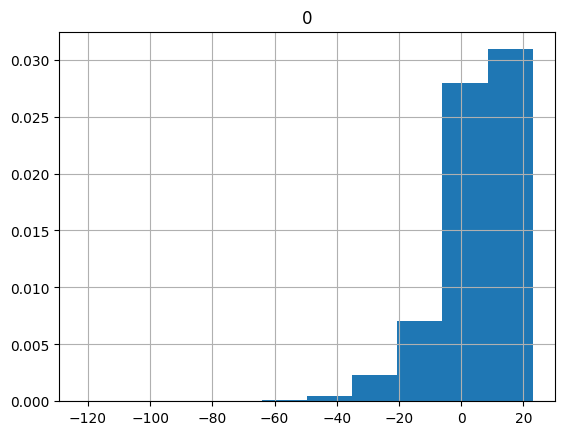

In [212]:
pd.DataFrame(lst).hist(density=1)

In [213]:
(pd.DataFrame(lst)<=0).sum()/n

0    0.2691
dtype: float64

In [76]:
sphl_temp = pd.read_excel("namelist/temp/SPHL.xlsx")
sphl_temp[["Requested share allotment", "Cash + FRGXX", "Equity in account prior to IPO indication"]] = sphl_temp[["Requested share allotment", 
            "Cash + FRGXX", 
            "Equity in account prior to IPO indication"]].fillna(0)

frgxx_temp = pd.read_excel("namelist/temp/temp_frgxx_position.xlsx")
total_temp = pd.read_excel("namelist/temp/temp_total_position.xlsx")

In [77]:
display(sphl_temp[:3])
display(frgxx_temp[:3])
display(total_temp[:3])

,Rep,Account Number,Account title,Type of account (cash/margin/dvp),Client type (institutional/retail),Date account was opened,Requested share allotment,Cash + FRGXX,Equity in account prior to IPO indication,Indicated allocated share amount,Final allocated share amount (no need for now),Methodology for difference between indication request and final allocation amount (No need for now),Wire Amount,Bank Account Address,"Is the individual a FINRA registered representative with any firm, if so what firm","Is the individual/entity related to or affiliated with any FINRA registered representative with any firm, if so what firm",Is the individual/entity related to or affiliated with the offering company or any of its affiliates or employees,Do any of these accounts share the same physical address?,Do any of these accounts share the same common control?,Did this client participate in the last two IPOs by this underwriter?
0,99,88SN9999,Xinyue Luo,CASH,retail,2024-06-11,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO
1,99,88SN9998,"EQUITY TRUST COMPANY, TRUSTEE, FBO YING CUI, R...",CASH,retail,2024-06-18,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO
2,91,88SN9997,LOCUST HOLDINGS LLC BUSINESS,MARGIN,retail,2023-11-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO


,Account Number,FRGXX MV
0,88SN2502,200.0
1,88SN2505,200.0
2,88SN3013,29900.0


,Account Number,TD Cash Balance,TD Total Equity
0,78SN6001,0.0,0.0
1,78SN6002,0.0,0.0
2,78SN9638,0.0,0.0


In [93]:
target_list = ["FRGXX MV", "TD Cash Balance", "TD Total Equity", "Indicated allocated share amount"]

merged = sphl_temp.merge(frgxx_temp, on="Account Number", how="left").merge(total_temp, on="Account Number", how="left")
merged[target_list] = merged[target_list].fillna(0)

# add up
merged["Cash + FRGXX"] = merged["FRGXX MV"] + merged["TD Cash Balance"]
merged['Equity in account prior to IPO indication'] = merged["TD Total Equity"]

# filter
merged = merged[merged['Cash + FRGXX'] >= 400.00]
merged['Indicated allocated share amount'] = ((merged['Cash + FRGXX']//40) *10).apply(lambda x: (x//100)*100 if x>500 else x).astype(int)

In [95]:
merged[:5]

,Rep,Account Number,Account title,Type of account (cash/margin/dvp),Client type (institutional/retail),Date account was opened,Requested share allotment,Cash + FRGXX,Equity in account prior to IPO indication,Indicated allocated share amount,...,Bank Account Address,"Is the individual a FINRA registered representative with any firm, if so what firm","Is the individual/entity related to or affiliated with any FINRA registered representative with any firm, if so what firm",Is the individual/entity related to or affiliated with the offering company or any of its affiliates or employees,Do any of these accounts share the same physical address?,Do any of these accounts share the same common control?,Did this client participate in the last two IPOs by this underwriter?,FRGXX MV,TD Cash Balance,TD Total Equity
1,99,88SN9998,"EQUITY TRUST COMPANY, TRUSTEE, FBO YING CUI, R...",CASH,retail,2024-06-18,0.0,8287.63,30002.0300,2000,...,NaN,NO,NO,NO,NO,NO,NO,8000.00,287.63,30002.0300
2,91,88SN9997,LOCUST HOLDINGS LLC BUSINESS,MARGIN,retail,2023-11-08,0.0,11796.23,11796.2300,2900,...,NaN,NO,NO,NO,NO,NO,NO,9600.00,2196.23,11796.2300
4,99,88SN9992,David Ada-Winter,CASH,retail,2024-06-18,0.0,46238.68,46667.8800,11500,...,NaN,NO,NO,NO,NO,NO,NO,44800.00,1438.68,46667.8800
5,99,88SN9988,QUN CUI AND JIN BO JIANG- JTROS,CASH,retail,2023-12-04,0.0,35340.40,40733.8484,8800,...,NaN,NO,NO,NO,NO,NO,NO,10413.75,24926.65,40733.8484
7,1,88SN9971,BIN XIONG,CASH,retail,2023-11-15,0.0,2961.80,2961.8000,700,...,NaN,NO,NO,NO,NO,NO,NO,0.00,2961.80,2961.8000


In [97]:
merged.to_csv("namelist/temp/SPHL IPO Allocation Velox 20240912.csv")

In [104]:
curvature_temp = pd.read_csv("namelist/temp/Curvature_temp.csv")

curvature_temp = curvature_temp[curvature_temp['TD Cash Balance'] >=400]
curvature_temp["Indicated allocated share amount"] = (curvature_temp[
                                                        "TD Cash Balance"
                                                    ]//40 * 10).apply(lambda x: (x//100)*100 if x>500 else x).astype(int)

In [105]:
curvature_temp.to_csv("namelist/temp/SPHL IPO Allocation Curvature 20240912.csv")

: 

In [95]:
import pandas as pd
import re

# Function to extract email and account number using regex
def extract_email_and_account(row):
    # Regular expression to match an email and account number starting with "AC99"
    email = row.split()[0]  # The first segment is assumed to be the email
    account_number = re.search(r"AC99\w+", row)  # Regex to match "AC99" followed by alphanumeric characters
    
    if account_number:
        return email, account_number.group(0)  # Return the email and the matched account number
    return email, None

# Main function to process the text file and output to CSV using pandas
def process_file(input_file, output_file):
    data = []
    
    # Read the file and extract email and account number
    with open(input_file, 'r', encoding="utf-8") as infile:
        for row in infile:
            print(row)
            row = row.strip()
            if row:
                email, account_number = extract_email_and_account(row)
                if email and account_number:
                    data.append([email, account_number])
    
    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=['Email', 'Account Number'])
    
    # Output to CSV
    df.to_csv(output_file, index=False)

def split_file(input, output):
    data = []
    with open(input, 'r', encoding="utf-8-sig") as infile:
        for row in infile:
            row = row.strip()
            if row:
                row = row.replace("，",",")
                row = row.split(",")
                print(row)
                data.append(row)
    df = pd.DataFrame(data)
    df.to_csv(output, index=False, encoding="utf-8-sig")


In [74]:
split_file("other_drafts/CRS Sending.txt", "namelist/others/ACAT_20241008.csv")

['esomchotdog@163.com', ' 戴雪峰', ' AC9900244', ' ACAT发', '']
['13724668442@139.com', ' 李刚', ' AC9900250', ' 开户', ' ENTITY', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['bixiameso00@hotmail.com', ' 李刚', ' AC9900251', ' 开户 ENTITY', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['come6061@163.com', ' 李刚', ' AC9900252', ' 开户', ' ENTITY', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['cooper9513@163.com', ' 李刚', ' AC9900253', ' 开户', ' ENTITY', ' 搞定', ' ACAT发', '']
['13927204972@139.com', ' 李刚', ' AC9900257', ' 开户', ' ENTITY', ' 搞定', ' ACAT发', '']
['cai00139@outlook.com', ' Jia Cai', ' 李刚', ' AC9900264', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['f_zhiqiang@outlook.com', ' zhiqiang feng', ' 李刚', ' AC9900265', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['x843204x@gmail.com', ' Jianhui Ye', ' 李刚', ' AC9900266', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['tyeeyeee@outlook.com', ' Ye Tian (Ye Yian)', ' 李刚', ' AC9900267', ' 回答雇佣信息', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['phone3220@163.com', ' Feng Xiao', ' 李刚', ' AC9900268', ' 搞定', ' ACAT发', ' 等待购买证明', '']
['apple7962@

In [96]:
f1 = pd.read_excel("other_drafts/F1 Funds Final.xlsx")
bala = pd.read_csv("other_drafts/Balance_October 10th 2024.csv")[["Account Number", "Td Cash Balance"]]
f1.merge(bala, on="Account Number", how="left").to_csv("other_drafts/F1 output.csv")

In [99]:
sphl = pd.read_excel("other_drafts/ACSS SPHL Tracking.xlsx")
bala = pd.read_csv("other_drafts/Balance_October 10th 2024.csv")[["Account Number", "Td Cash Balance"]]
sphl.merge(bala, on="Account Number", how="left").to_csv("other_drafts/SPHL output.csv")

In [94]:
call = pd.read_excel("other_drafts/INNO Call 20241009.xlsx")
call_debit = pd.read_excel("other_drafts/INNO Call Debit 20241009.xlsx")
velox = pd.read_excel("other_drafts/Velox customer list 1324.xlsx")[["Account Number", "Email Address", "Phone Number"]]

call.merge(velox, on="Account Number", how="left").to_csv("other_drafts/call.csv")
call_debit.merge(velox, on="Account Number", how="left").to_csv("other_drafts/call_debit.csv")

In [102]:
twg_list = pd.read_csv("namelist/twg/Balance_October 10th 2024.csv")
all_email = pd.read_csv("namelist/all_email.csv")

twg_list.merge(all_email, on="Account Number", how="left").to_csv("namelist/twg/twg_namelist.csv")

In [48]:
!pip install PyPDF2

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from PyPDF2 import PdfReader

# 打开 PDF 文件
reader = PdfReader("other_drafts/Meng Cheng Onboarding.pdf")
text = ""

# 遍历 PDF 中的每一页
for page in reader.pages:
    text += page.extract_text() + "\n"

print(text)

AC SUNSHINE SECURITIES LLC
200 E Robinson St, Orlando
FL, 32801
Member SIPC & FINRA
New Account Application
ACCOUNT: ACSS-AC9900397 ACCOUNT TITLE:  MENG CHENG
ACCOUNT INFORMATION
First Name:
MENGMiddle Name: Last Name:
CHENG
Email Address:
MCHENGLAW@YAHOO.COMPhone Number:
+1 (516) 698-8878Birth Date:
11/05/1972
Address:
315 WOODBINE AVE City:
NORTHPORT
State:
NYZip Code:
11768_____Country:
US
Account Type:
INDIVIDUAL
PROOF OF ADDRESS:

IDENTITY
Identification Type:
DRIVER LICENSEIdentification No.:
190744425Issue Date:
09/17/2019Expiration Date:
11/05/2025
Birth Date:
11/05/1972Social Security No:
242-71-5383
YES NO
My country of ID is the same as my physical address.
My country of taxation is the same as my physical address.
My country of citizenship is the same as my physical address.
PROOF OF IDENTITY:

TRUSTED CONTACT
Complete Name
JIE STEVE  CHENG
Complete Address
315 WOODBINE AVE, NORTHPORT, NY, US
Relationship
SPOUSE
Birth Date
09/17/1972Identification Type
DRIVER LICENSEID
5487

In [51]:
import pdfplumber
import pandas as pd

# 打开 PDF 文件
with pdfplumber.open("other_drafts/Meng Cheng Onboarding.pdf") as pdf:
    # 提取 PDF 中的第一页内容
    first_page = pdf.pages[0]
    
    # 使用 extract_table 方法提取表格内容
    table = first_page.extract_table()

    # 将提取的表格数据转换为 DataFrame
    if table:
        df = pd.DataFrame(table[1:], columns=table[0])  # 第一行为表头
        print(df)
    else:
        print("未检测到表格内容")


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   -------------------- ------------------- 2.9/5.6 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 16.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 23.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 3.1/3.1 MB 36.0 MB/s eta 0:00:00
                   ACCOUNT INFORMATION                              None  \
0                    First Name:\nMENG                      Middle Name:   
1  Email Address:\nMCHENGLAW@YAHOO.COM  Phone Number:\n+1 (516) 698-8878   
2           Address:\n315 WOODBINE AVE                              None   
3                           State:\nNY             Zip Code:\n11768_____   
4            Account Type:\